In [120]:
import tensorflow as tf
from tensorflow.keras import layers, models

from tensorflow.keras.datasets import mnist

import numpy as np

import matplotlib.pyplot as plt

from PIL import Image

Paso 2: Cargar el conjunto de datos MNIST

In [121]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Paso 3: Preprocesar los datos

In [122]:
x_train = x_train.astype('float32') / 255  # Normalización

x_test = x_test.astype('float32') / 255

x_train = x_train.reshape(-1, 28 * 28)     # Aplanar las imágenes

x_test = x_test.reshape(-1, 28 * 28)
y_train = tf.keras.utils.to_categorical(y_train, 10)  # One-hot encoding

y_test = tf.keras.utils.to_categorical(y_test, 10)

# Paso 4: Definir el modelo MLP

In [245]:


model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))



model.add(layers.Dense(10, activation='softmax'))  # 10 clases de salida


# Paso 5: Compilar el modelo

In [246]:
model.compile(optimizer='adam',

              loss='categorical_crossentropy',

              metrics=['accuracy'])


# Paso 6: Entrenar el modelo

In [247]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 10s 18ms/step - loss: 0.3469 - accuracy: 0.8933 - val_loss: 0.1209 - val_accuracy: 0.9658
Epoch 2/10
422/422 [==============================] - 7s 16ms/step - loss: 0.1044 - accuracy: 0.9691 - val_loss: 0.0913 - val_accuracy: 0.9742
Epoch 3/10
422/422 [==============================] - 7s 16ms/step - loss: 0.0716 - accuracy: 0.9779 - val_loss: 0.0804 - val_accuracy: 0.9780
Epoch 4/10
422/422 [==============================] - 8s 18ms/step - loss: 0.0489 - accuracy: 0.9849 - val_loss: 0.0738 - val_accuracy: 0.9793
Epoch 5/10
422/422 [==============================] - 7s 17ms/step - loss: 0.0399 - accuracy: 0.9875 - val_loss: 0.0875 - val_accuracy: 0.9763
Epoch 6/10
422/422 [==============================] - 6s 15ms/step - loss: 0.0339 - accuracy: 0.9893 - val_loss: 0.0804 - val_accuracy: 0.9785
Epoch 7/10
422/422 [==============================] - 6s 15ms/step - loss: 0.0309 - accuracy: 0.9901 - val_loss: 0.0923 - val_accuracy: 0.976

# Paso 7: Evaluar el modelo

In [248]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f'Precisión en el conjunto de prueba: {test_acc}')


313/313 [==============================] - 1s 4ms/step - loss: 0.1196 - accuracy: 0.9733
Precisión en el conjunto de prueba: 0.9732999801635742


# Paso 8: Probar el modelo con una imagen del conjunto de prueba

1/1 [==============================] - 0s 119ms/step


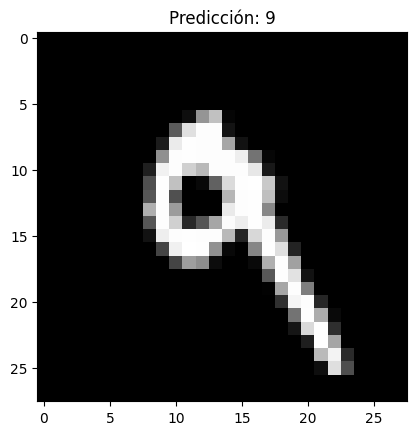

In [249]:
imagen = x_test[7].reshape(1, 28 * 28)  # Seleccionar la primera imagen

prediccion = model.predict(imagen)

digit_predicho = np.argmax(prediccion)

# Mostrar la imagen y el dígito predicho

plt.imshow(x_test[7].reshape(28, 28), cmap='gray')

plt.title(f'Predicción: {digit_predicho}')

plt.show()


# Paso 9: Probar el modelo con una imagen personalizada

1/1 [==============================] - 0s 35ms/step
Predicción para la imagen personalizada: 2


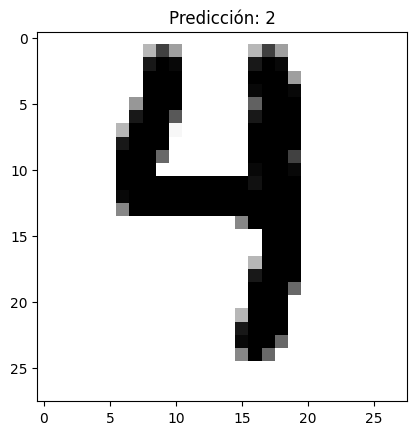

In [250]:
#ruta_imagen="D:/talento tech/ia/imagen1.png"

def predecir_imagen_personalizada(ruta_imagen):

    img = Image.open(ruta_imagen).convert('L')  # Convertir a escala de grises

    img = img.resize((28, 28))  # Redimensionar a 28x28 píxeles

    img_array = np.array(img).reshape(1, 28 * 28).astype('float32') / 255  # Normalizar

    prediccion = model.predict(img_array)  # Hacer la predicción

    digit_predicho = np.argmax(prediccion)

    print(f'Predicción para la imagen personalizada: {digit_predicho}')

    plt.imshow(img, cmap='gray')

    plt.title(f'Predicción: {digit_predicho}')

    plt.show()

# Prueba con una imagen personalizada (comenta o descomenta según lo necesites)

predecir_imagen_personalizada('D:/Inteligencia artifical/prueba 4.png')

Procesando imágenes en la carpeta: D:/Inteligencia artifical/test2/
Archivo encontrado: 0.png
Procesando imagen: D:/Inteligencia artifical/test2/0.png
Imagen procesada correctamente: D:/Inteligencia artifical/test2/0.png
1/1 [==============================] - 0s 40ms/step
Predicción para 0.png: 0


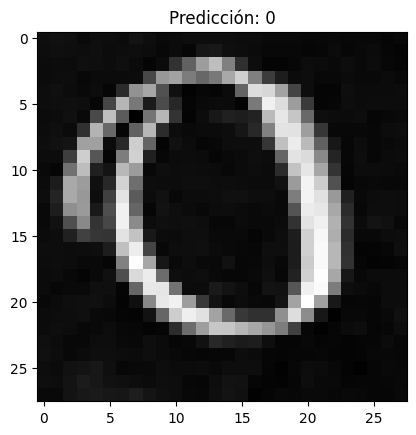

Archivo encontrado: 1.png
Procesando imagen: D:/Inteligencia artifical/test2/1.png
Imagen procesada correctamente: D:/Inteligencia artifical/test2/1.png
1/1 [==============================] - 0s 35ms/step
Predicción para 1.png: 8


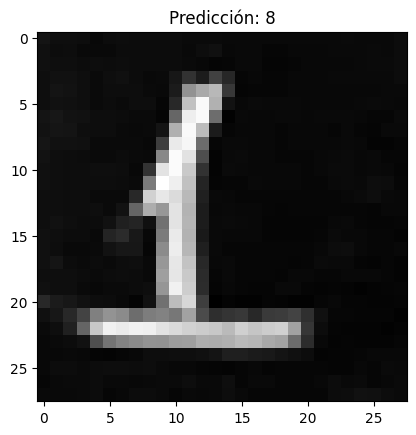

Archivo encontrado: 2.png
Procesando imagen: D:/Inteligencia artifical/test2/2.png
Imagen procesada correctamente: D:/Inteligencia artifical/test2/2.png
1/1 [==============================] - 0s 28ms/step
Predicción para 2.png: 3


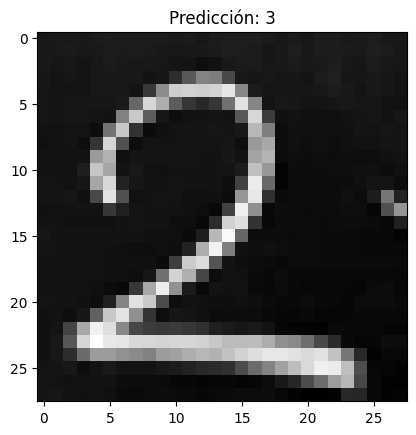

Archivo encontrado: 3.png
Procesando imagen: D:/Inteligencia artifical/test2/3.png
Imagen procesada correctamente: D:/Inteligencia artifical/test2/3.png
1/1 [==============================] - 0s 32ms/step
Predicción para 3.png: 0


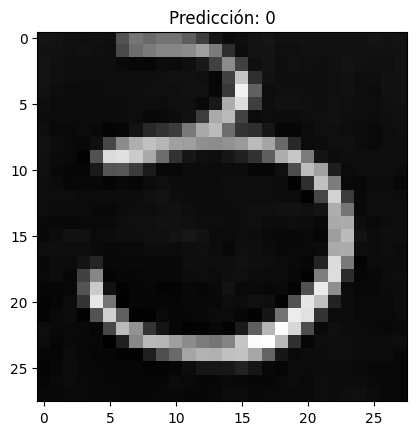

Archivo encontrado: 4.png
Procesando imagen: D:/Inteligencia artifical/test2/4.png
Imagen procesada correctamente: D:/Inteligencia artifical/test2/4.png
1/1 [==============================] - 0s 30ms/step
Predicción para 4.png: 9


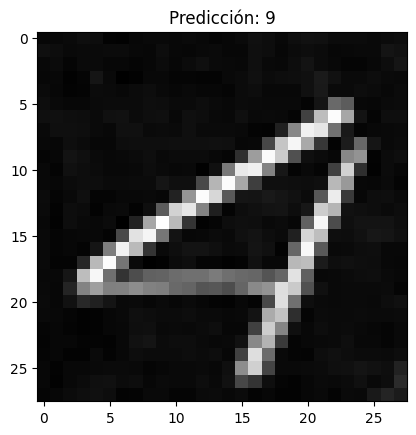

Archivo encontrado: 5.png
Procesando imagen: D:/Inteligencia artifical/test2/5.png
Imagen procesada correctamente: D:/Inteligencia artifical/test2/5.png
1/1 [==============================] - 0s 31ms/step
Predicción para 5.png: 0


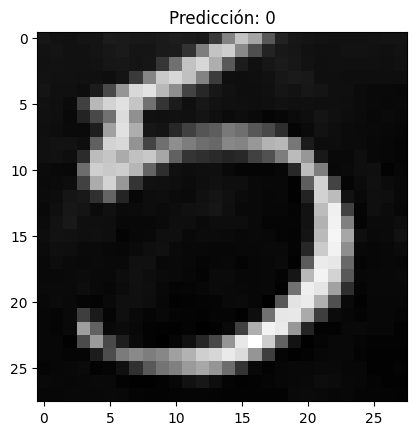

Archivo encontrado: 6.png
Procesando imagen: D:/Inteligencia artifical/test2/6.png
Imagen procesada correctamente: D:/Inteligencia artifical/test2/6.png
1/1 [==============================] - 0s 28ms/step
Predicción para 6.png: 5


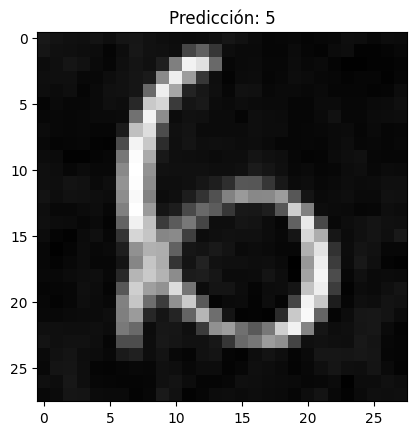

Archivo encontrado: 7.png
Procesando imagen: D:/Inteligencia artifical/test2/7.png
Imagen procesada correctamente: D:/Inteligencia artifical/test2/7.png
1/1 [==============================] - 0s 32ms/step
Predicción para 7.png: 8


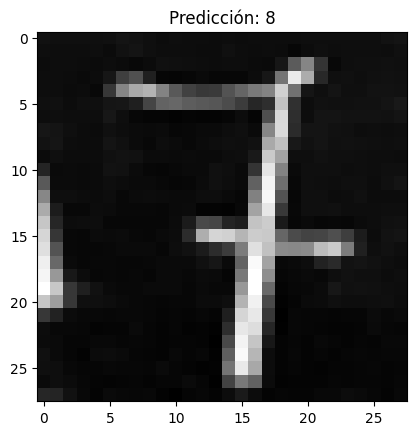

Archivo encontrado: 8.png
Procesando imagen: D:/Inteligencia artifical/test2/8.png
Imagen procesada correctamente: D:/Inteligencia artifical/test2/8.png
1/1 [==============================] - 0s 37ms/step
Predicción para 8.png: 9


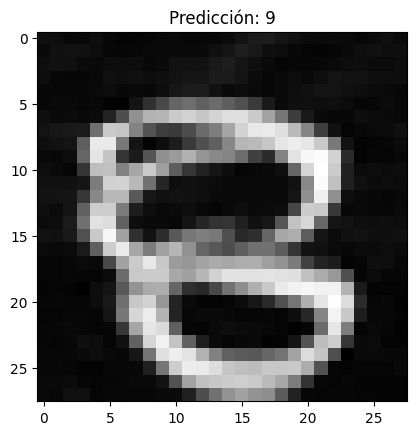

Archivo encontrado: 9.png
Procesando imagen: D:/Inteligencia artifical/test2/9.png
Imagen procesada correctamente: D:/Inteligencia artifical/test2/9.png
1/1 [==============================] - 0s 32ms/step
Predicción para 9.png: 7


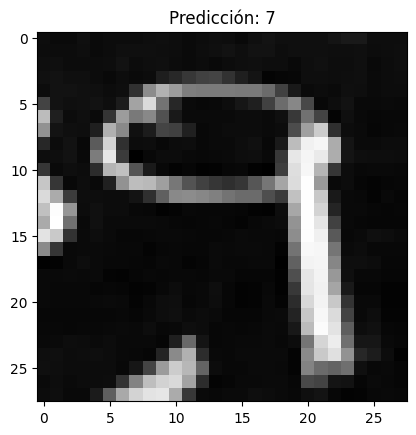

In [251]:
import os
def predecir_imagen_personalizada(ruta_imagen):
    try:
        print(f"Procesando imagen: {ruta_imagen}")  # Debug
        img = Image.open(ruta_imagen).convert('L')  # Convertir a escala de grises
        img = img.resize((28, 28))  # Redimensionar a 28x28 píxeles
        img_array = np.array(img).reshape(1, 28 * 28).astype('float32') / 255  # Normalizar

        print(f"Imagen procesada correctamente: {ruta_imagen}")  # Debug

        prediccion = model.predict(img_array)  # Hacer la predicción
        digit_predicho = np.argmax(prediccion)

        print(f'Predicción para {os.path.basename(ruta_imagen)}: {digit_predicho}')  # Imprimir resultado

        plt.imshow(img, cmap='gray')
        plt.title(f'Predicción: {digit_predicho}')
        plt.show()
    
    except Exception as e:
        print(f"Error procesando {ruta_imagen}: {e}")

# Función para iterar sobre todas las imágenes en una carpeta
def predecir_imagenes_en_carpeta(ruta_carpeta):
    print(f"Procesando imágenes en la carpeta: {ruta_carpeta}")
    
    archivos_encontrados = os.listdir(ruta_carpeta)  # Obtener la lista de archivos
    
    if len(archivos_encontrados) == 0:
        print(f"No se encontraron archivos en la carpeta: {ruta_carpeta}")
    
    for archivo in archivos_encontrados:
        print(f"Archivo encontrado: {archivo}")  # Imprimir cada archivo encontrado
        
        if archivo.endswith(('.png', '.jpg', '.jpeg')):  # Verificar si es una imagen
            ruta_imagen = os.path.join(ruta_carpeta, archivo)
            predecir_imagen_personalizada(ruta_imagen)
        else:
            print(f"{archivo} no es una imagen válida.")  # Archivos no válidos

# Ruta de la carpeta de imágenes de prueba
ruta_carpeta = 'D:/Inteligencia artifical/test2/'

# Ejecutar la predicción para todas las imágenes en la carpeta
predecir_imagenes_en_carpeta(ruta_carpeta)